# Gestão de estado no Jetpack Compose

A UI em uma aplicação Android é formada por diversos elementos, ou seja, a quebramos em diversos componentes, para combina-los de forma diferente e otimizar nosso código.

Outro fator importante é que podemos manter o estado da aplicação em seus diversos componentes. Para isso usamos o <b>State Hoisting</b> que significa manter o estado em um componenete de hierarquia mais alta, OU podemos utilizar uma arquitetura chamada Model-View-View-Model ou MVVM, para os intímos.

- A elevação de Estado ou "State Hoisting" é um design pattern que orienta a implementação de componenetes "Stateless", ou seja, que não gerenciam o próprio estaado.

- Conforme foi dito, a figura abaixo, representa a "Estrutura hierárquica da aplicação", onde:

    - Componente "AppScreen" é o de hierarquia mais alta
    
    - <b>Componentes filhos, "Componente1,Componente2 e Componente3"são de hierarquia mais baixa, quem deve maner o estado da tela é o "AppScreen", por tanto as variáveis de estado devem ser declaradas neste componenete e os "filhos" recem o estado e comportamento do componenete AppScreen.</b>


<center>

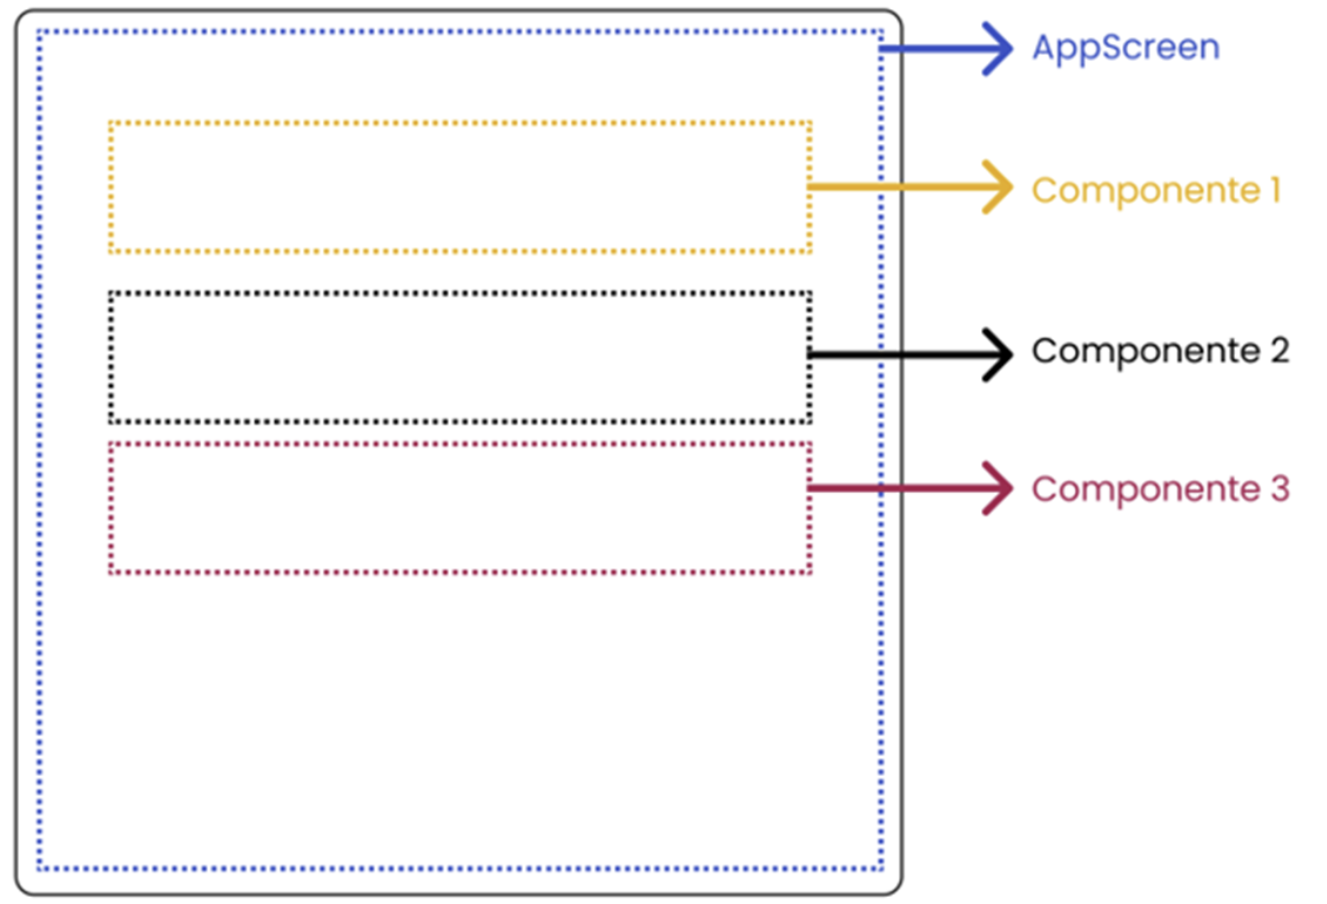

</center>


Temos a seguinte aplicação e queremos componentiza-la para evitar deixar o código repetitivo e verboso:


Arquivo MainActivity.kt:

In [ ]:
package br.com.fiap.calculodejuros

import android.os.Bundle
import androidx.activity.ComponentActivity
import androidx.activity.compose.setContent
import androidx.compose.foundation.layout.Box
import androidx.compose.foundation.layout.Column
import androidx.compose.foundation.layout.Row
import androidx.compose.foundation.layout.Spacer
import androidx.compose.foundation.layout.fillMaxSize
import androidx.compose.foundation.layout.fillMaxWidth
import androidx.compose.foundation.layout.height
import androidx.compose.foundation.layout.padding
import androidx.compose.foundation.text.KeyboardOptions
import androidx.compose.material3.Button
import androidx.compose.material3.Card
import androidx.compose.material3.CardDefaults
import androidx.compose.material3.MaterialTheme
import androidx.compose.material3.OutlinedTextField
import androidx.compose.material3.Surface
import androidx.compose.material3.Text
import androidx.compose.runtime.Composable
import androidx.compose.runtime.getValue
import androidx.compose.runtime.mutableStateOf
import androidx.compose.runtime.remember
import androidx.compose.runtime.setValue
import androidx.compose.ui.Alignment
import androidx.compose.ui.Modifier
import androidx.compose.ui.graphics.Color
import androidx.compose.ui.text.font.FontWeight
import androidx.compose.ui.text.input.KeyboardType
import androidx.compose.ui.text.style.TextAlign
import androidx.compose.ui.unit.dp
import androidx.compose.ui.unit.sp
import br.com.fiap.calculodejuros.calculos.calcularJuros
import br.com.fiap.calculodejuros.calculos.calcularMontante
import br.com.fiap.calculodejuros.ui.theme.CalculoDeJurosTheme

class MainActivity : ComponentActivity() {
    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        setContent {
            CalculoDeJurosTheme {
                // A surface container using the 'background' color from the theme
                Surface(
                    modifier = Modifier.fillMaxSize(),
                    color = MaterialTheme.colorScheme.background
                ) {
                    JurosScreen()
                }
            }
        }
    }
}

@Composable
fun JurosScreen() {

    var capital by remember { mutableStateOf("") }
    var taxa by remember { mutableStateOf("") }
    var tempo by remember { mutableStateOf("") }
    var juros by remember { mutableStateOf(0.0) }
    var montante by remember { mutableStateOf(0.0) }

    Box(
        modifier = Modifier.padding(16.dp),
        contentAlignment = Alignment.Center
    ) {
        Column() {
            Text(
                text = "Cálculo de Juros Simples",
                modifier = Modifier.fillMaxWidth(),
                fontSize = 20.sp,
                color = Color.Red,
                fontWeight = FontWeight.Bold,
                textAlign = TextAlign.Center
            )
            Spacer(modifier = Modifier.height(32.dp))
            // Formulário para entrada de dados
            Card(
                modifier = Modifier
                    .fillMaxWidth()
            ) {
                Column(modifier = Modifier.padding(16.dp)) {
                    Text(
                        text = "Dados do Investimento",
                        fontWeight = FontWeight.Bold
                    )
                    // Caixas de entrada da aplicação
                    OutlinedTextField(
                        value = capital,
                        onValueChange = { capital = it },
                        modifier = Modifier
                            .fillMaxWidth()
                            .padding(top = 16.dp),
                        placeholder = {
                            Text(text = "Quanto deseja investir?")
                        },
                        label = {
                            Text(text = "Valor do investimento")
                        },
                        keyboardOptions = KeyboardOptions(
                            keyboardType = KeyboardType.Decimal
                        )
                    )
                    OutlinedTextField(
                        value = taxa,
                        onValueChange = { taxa = it },
                        modifier = Modifier
                            .fillMaxWidth()
                            .padding(top = 16.dp),
                        placeholder = {
                            Text(text = "Qual a taxa de juros mensal?")
                        },
                        label = {
                            Text(text = "Taxa de juros mensal")
                        },
                        keyboardOptions = KeyboardOptions(
                            keyboardType = KeyboardType.Decimal
                        )
                    )
                    OutlinedTextField(
                        value = tempo,
                        onValueChange = { tempo = it },
                        modifier = Modifier
                            .fillMaxWidth()
                            .padding(top = 16.dp),
                        placeholder = {
                            Text(text = "Qual o tempo em meses?")
                        },
                        label = {
                            Text(text = "Período em meses")
                        },
                        keyboardOptions = KeyboardOptions(
                            keyboardType = KeyboardType.Decimal
                        )
                    )
                    Button(
                        onClick = {
                            juros = calcularJuros(
                                capital = capital.toDouble(),
                                taxa = taxa.toDouble(),
                                tempo = tempo.toDouble()
                            )
                            montante = calcularMontante(
                                capital = capital.toDouble(),
                                juros = juros
                            )
                        },
                        modifier = Modifier
                            .fillMaxWidth()
                            .padding(top = 32.dp)
                    ) {
                        Text(text = "CALCULAR")
                    }
                }
            }
            Spacer(modifier = Modifier.height(16.dp))
            // Resultado da aplicação
            Card(
                modifier = Modifier
                    .fillMaxWidth(),
                colors = CardDefaults.cardColors(
                    containerColor = Color(0xFF4CAF50)
                )
            ) {
                Column(
                    modifier = Modifier
                        //.fillMaxSize()
                        .padding(16.dp)
                ) {
                    Text(
                        text = "Resultado",
                        fontSize = 18.sp,
                        fontWeight = FontWeight.Bold,
                        color = Color.White
                    )
                    Spacer(modifier = Modifier.height(16.dp))
                    Row(modifier = Modifier.fillMaxWidth()) {
                        Text(
                            text = "Juros",
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold
                        )
                        Text(
                            text = juros.toString(),
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold,
                            color = Color.White
                        )
                    }
                    Spacer(modifier = Modifier.height(8.dp))
                    Row(modifier = Modifier.fillMaxWidth()) {
                        Text(
                            text = "Montante",
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold
                        )
                        Text(
                            text = montante.toString(),
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold,
                            color = Color.White
                        )
                    }
                }
            }
        }
    }
}

Arquivo CalcularJuros.kt, dentro do pacote "calculos":

In [ ]:
package br.com.fiap.calculodejuros.calculos

fun calcularJuros(capital: Double, taxa: Double, tempo: Double): Double {
    return capital * taxa / 100 * tempo
}

fun calcularMontante(capital: Double, juros: Double): Double {
    return capital + juros
}

Que produz o seguinte resultado:

<center>

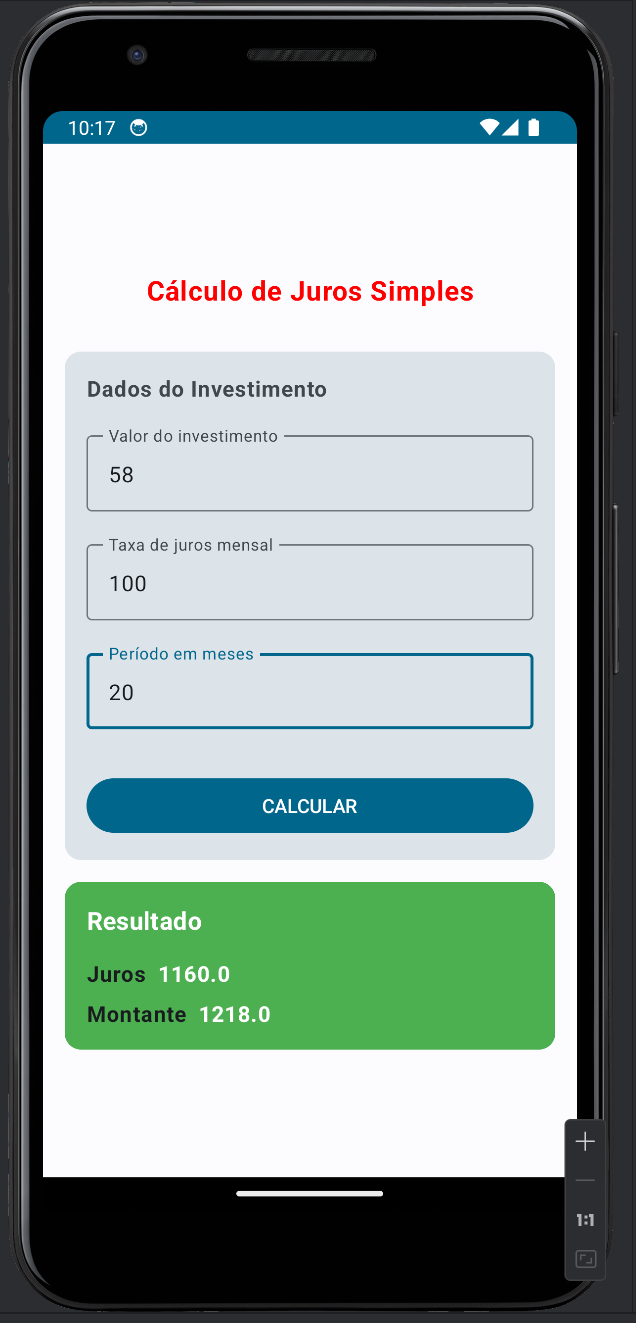

</center>

# Agora nosso intuito será componentiza-lo

Afim de deixar o código menos repetitivo e verboso ! Atualmente temos 214 linhas de código. Vamos ver quanto ficará no final!

- Primeiro vamos analisar o código... e com uma rapida análise vemos que temos pelo menos 3x OutlinedTextField, bem similares, por tanto vamos modularizar este da seguinte maneira:

- Vamos criar um novo Pacote chamado "components", criando um file "CaixaDeEntrada.kt" e neste arquivo montaremos uma função que replica uma OutlinedTextField, porém personalizando seus campos.

- Desta maneira podemos chamar a função e apenas passar os parameros, ao inves de redigir tudo novamente.

In [ ]:
package br.com.fiap.calculodejuros.components

import androidx.compose.foundation.layout.fillMaxWidth
import androidx.compose.foundation.layout.padding
import androidx.compose.foundation.text.KeyboardOptions
import androidx.compose.material3.OutlinedTextField
import androidx.compose.material3.Text
import androidx.compose.runtime.Composable
import androidx.compose.ui.Modifier
import androidx.compose.ui.text.input.KeyboardType
import androidx.compose.ui.unit.dp

@Composable
fun CaixaDeEntrada(
    value: String,
    label: String,
    placeHolder: String,
    keyboardType: KeyboardType,
    modifier:Modifier
) {
    OutlinedTextField(
    value = value,
    onValueChange = { },
    label = {
        Text(text = label)
    },
    placeholder = {
        Text(text = placeHolder)
    },
    keyboardOptions = KeyboardOptions(keyboardType = keyboardType),
    modifier = modifier,
)

}

Após isso iremos substituir o OutlinedTextField, pela nossa função, repara a diferença no tamanho que era (comentado) e no tamanho que ficará:

In [ ]:
// Caixas de entrada da aplicação como era
//                    OutlinedTextField(
//                        value = capital,
//                        onValueChange = { capital = it },
//                        modifier = Modifier
//                            .fillMaxWidth()
//                            .padding(top = 16.dp),
//                        placeholder = {
//                            Text(text = "Quanto deseja investir?")
//                        },
//                        label = {
//                            Text(text = "Valor do investimento")
//                        },
//                        keyboardOptions = KeyboardOptions(
//                            keyboardType = KeyboardType.Decimal
//                        )
//                    )


// Como ficou
                    CaixaDeEntrada(
                        value = capital,
                        label = "Valor investimento",
                        placeHolder ="Quanto deseja investir",
                        keyboardType = KeyboardType.Number,
                        modifier = Modifier.fillMaxWidth().padding(top=16.dp)
                    )

## Resumidamente - Componentizando

O intuito é componentizar, utilizando funções para otimizar e ganhar tempo com reaproveitamento de código!

# Elevação de estado - State Hoisting

- Quando criamos um componente que irá replicar outro componente, precisamos garantir que cada componente tenha seu próprio comportamento!

- Quando temos componentes assim, ele deve ser StateLess, ou seja, quem deve passar seu estado é o componente PAI deste componente

- Para isso <i style="color:crimson">vamo elevar o estado do filho para o pai!, ou seja o pai armazena as variaveis de estado do filho </i>






In [ ]:

class MainActivity : ComponentActivity() {
    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        setContent {
            CalculoDeJurosTheme {
                
                Surface(
                    modifier = Modifier.fillMaxSize(),
                    color = MaterialTheme.colorScheme.background
                ) {
                    JurosScreen()
                }
            }
        }
    }
}

@Composable
//Pai de Caixa de entrada
fun JurosScreen() {

    //Portanto o pai armazena as variaveis de estado do filho
    var capital by remember { mutableStateOf("") }
    var taxa by remember { mutableStateOf("") }
    var tempo by remember { mutableStateOf("") }
    var juros by remember { mutableStateOf(0.0) }
    var montante by remember { mutableStateOf(0.0) }

    Box(
        modifier = Modifier.padding(16.dp),
        contentAlignment = Alignment.Center
    ) {
        Column() {
            Text(
                text = "Cálculo de Juros Simples",
                modifier = Modifier.fillMaxWidth(),
                fontSize = 20.sp,
                color = Color.Red,
                fontWeight = FontWeight.Bold,
                textAlign = TextAlign.Center
            )
            Spacer(modifier = Modifier.height(32.dp))
           
            Card(
                modifier = Modifier
                    .fillMaxWidth()
            ) {
                Column(modifier = Modifier.padding(16.dp)) {
                    Text(
                        text = "Dados do Investimento",
                        fontWeight = FontWeight.Bold
                    )
                
                        // Caixa de entrada é filha de JurosScreen
                    CaixaDeEntrada(
                        value = capital,
                        label = "Valor investimento",
                        placeHolder ="Quanto deseja investir",
                        keyboardType = KeyboardType.Number,
                        modifier = Modifier.fillMaxWidth().padding(top=16.dp)
                    )
                    CaixaDeEntrada(
                        value = taxa,
                        label = "Taxa de juros mensal",
                        placeHolder ="Qual a taxa de juros mensal?",
                        keyboardType = KeyboardType.Decimal,
                        modifier = Modifier.fillMaxWidth().padding(top=16.dp)
                    )
                    CaixaDeEntrada(
                        value = tempo,
                        label = "Período em meses",
                        placeHolder ="Qual o tempo em meses?",
                        keyboardType = KeyboardType.Decimal,
                        modifier = Modifier.fillMaxWidth().padding(top=16.dp)
                    )
                    Button(
                        onClick = {
                            juros = calcularJuros(
                                capital = capital.toDouble(),
                                taxa = taxa.toDouble(),
                                tempo = tempo.toDouble()
                            )
                            montante = calcularMontante(
                                capital = capital.toDouble(),
                                juros = juros
                            )
                        },
                        modifier = Modifier
                            .fillMaxWidth()
                            .padding(top = 32.dp)
                    ) {
                        Text(text = "CALCULAR")
                    }
                }
            }
            Spacer(modifier = Modifier.height(16.dp))
            // Resultado da aplicação
            Card(
                modifier = Modifier
                    .fillMaxWidth(),
                colors = CardDefaults.cardColors(
                    containerColor = Color(0xFF4CAF50)
                )
            ) {
                Column(
                    modifier = Modifier
                        //.fillMaxSize()
                        .padding(16.dp)
                ) {
                    Text(
                        text = "Resultado",
                        fontSize = 18.sp,
                        fontWeight = FontWeight.Bold,
                        color = Color.White
                    )
                    Spacer(modifier = Modifier.height(16.dp))
                    Row(modifier = Modifier.fillMaxWidth()) {
                        Text(
                            text = "Juros",
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold
                        )
                        Text(
                            text = juros.toString(),
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold,
                            color = Color.White
                        )
                    }
                    Spacer(modifier = Modifier.height(8.dp))
                    Row(modifier = Modifier.fillMaxWidth()) {
                        Text(
                            text = "Montante",
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold
                        )
                        Text(
                            text = montante.toString(),
                            modifier = Modifier.padding(end = 8.dp),
                            fontSize = 16.sp,
                            fontWeight = FontWeight.Bold,
                            color = Color.White
                        )
                    }
                }
            }
        }
    }
}

## Ajustar o onClick

Para ajusta o onClick e o campo receber as mudançar, vamos criar a variavel atualizaValor que recebe Unit, e a incluiremos no onValueChange:

In [ ]:
@Composable
fun CaixaDeEntrada(
    value: String,
    label: String,
    placeHolder: String,
    keyboardType: KeyboardType,
    modifier:Modifier,
    //Criamos a variavel atualizaValor, do tipo String que recebe Unit
    atualizaValor: (String) -> Unit
) {
    OutlinedTextField(
    value = value,
    //A passamos para o onValueChange
    onValueChange = { atualizaValor(it)},
    label = {
        Text(text = label)
    },
    placeholder = {
        Text(text = placeHolder)
    },
    keyboardOptions = KeyboardOptions(keyboardType = keyboardType),
    modifier = modifier,
)


Após isso precisamos corrigir no main também , adicionando uma função ao final da CaixaDeEntrada, da seguinte maneira:

In [ ]:
CaixaDeEntrada(
    value = tempo,
    label = "Periodo em meses",
    placeHolder ="Qual o tempo em meses?",
    keyboardType = KeyboardType.Decimal,
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 16.dp)
        //Aqui abriremos a função e passaremos o value = it... sendo o igual ao valor de value
) {tempo = it}

## Agora vamos componentizar também o card de resultado!

Para isso seguimos os mesmos passos:

1- Criando um novo "File" dentro do package "componentes" e o nomeamos de CardResultado

2- Criamos o composable com a nova função CardResultado, e dentro da função dela colamos o card que estavana no arquivo main

3- Após isto, nos foi sinalizado, que tinhamos duas variáveis não criadas, "juros" e "montante", como sabemos que ambas são Double (sabemos pois estão como Double no arquivo main)

4- Criamos estas duas variaveis no inicio da função e pronto!

5- Agora basta chamar a função e passos o juros e montante que funcionará no main também!

In [ ]:
package br.com.fiap.calculodejuros.components

@Composable
fun CardResultado(
    juros: Double,
    montante: Double

) {
    Card(
        modifier = Modifier
            .fillMaxWidth(),
        colors = CardDefaults.cardColors(
            containerColor = Color(0xFF4CAF50)
        )
    ) {
        Column(
            modifier = Modifier
                //.fillMaxSize()
                .padding(16.dp)
        ) {
            Text(
                text = "Resultado",
                fontSize = 18.sp,
                fontWeight = FontWeight.Bold,
                color = Color.White
            )
            Spacer(modifier = Modifier.height(16.dp))
            Row(modifier = Modifier.fillMaxWidth()) {
                Text(
                    text = "Juros",
                    modifier = Modifier.padding(end = 8.dp),
                    fontSize = 16.sp,
                    fontWeight = FontWeight.Bold
                )
                Text(
                    text = juros.toString(),
                    modifier = Modifier.padding(end = 8.dp),
                    fontSize = 16.sp,
                    fontWeight = FontWeight.Bold,
                    color = Color.White
                )
            }
            Spacer(modifier = Modifier.height(8.dp))
            Row(modifier = Modifier.fillMaxWidth()) {
                Text(
                    text = "Montante",
                    modifier = Modifier.padding(end = 8.dp),
                    fontSize = 16.sp,
                    fontWeight = FontWeight.Bold
                )
                Text(
                    text = montante.toString(),
                    modifier = Modifier.padding(end = 8.dp),
                    fontSize = 16.sp,
                    fontWeight = FontWeight.Bold,
                    color = Color.White
                )
            }
        }
    }
}

## Chamando a função CardResultados

Iremos chamar a função CardResultados na main e olha quanto código ocultamos e poupamos neste arquivo, <b>de 51x Linhas de código para 1x Linha!</b>:

In [ ]:
// Resultado da aplicação


//            Card(
//                modifier = Modifier
//                    .fillMaxWidth(),
//                colors = CardDefaults.cardColors(
//                    containerColor = Color(0xFF4CAF50)
//                )
//            ) {
//                Column(
//                    modifier = Modifier
//                      .fillMaxSize()
//                        .padding(16.dp)
//                ) {
//                    Text(
//                        text = "Resultado",
//                        fontSize = 18.sp,
//                        fontWeight = FontWeight.Bold,
//                        color = Color.White
//                    )
//                    Spacer(modifier = Modifier.height(16.dp))
//                    Row(modifier = Modifier.fillMaxWidth()) {
//                        Text(
//                            text = "Juros",
//                            modifier = Modifier.padding(end = 8.dp),
//                            fontSize = 16.sp,
//                            fontWeight = FontWeight.Bold
//                        )
//                        Text(
//                            text = juros.toString(),
//                            modifier = Modifier.padding(end = 8.dp),
//                            fontSize = 16.sp,
//                            fontWeight = FontWeight.Bold,
//                            color = Color.White
//                        )
//                    }
//                    Spacer(modifier = Modifier.height(8.dp))
//                    Row(modifier = Modifier.fillMaxWidth()) {
//                        Text(
//                            text = "Montante",
//                            modifier = Modifier.padding(end = 8.dp),
//                            fontSize = 16.sp,
//                            fontWeight = FontWeight.Bold
//                        )
//                        Text(
//                            text = montante.toString(),
//                            modifier = Modifier.padding(end = 8.dp),
//                            fontSize = 16.sp,
//                            fontWeight = FontWeight.Bold,
//                            color = Color.White
//                        )
//                    }
//                }
//            }


CardResultado(juros = juros, montante = montante)

# Model View ViewModel = MVVM

Composto por Model, View e ViewModel, onde cada um tem um atribuição/responsábilidade.

<center>

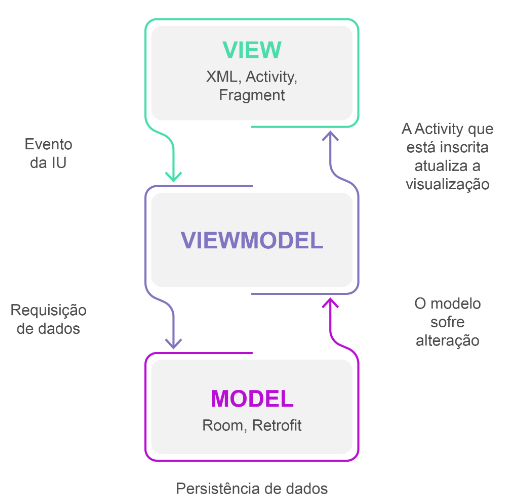

</center>

## Model
- Camada de dados
- Lógica de negocio
- Calculos, acesso a base de dados

## View
- Camada de apresentação dos dados.

## ViewModel
- Conecta View com o Model

#

- Para cada tela, ou seja arquivo View precisaremos de um de ViewModel
- Dentro da ViewModel, os gerenciadores/observaveis de estado, e a view deverá receber a mudança da ViewModel a cada mudança
- Arquivos View, são arquivo tipo File
- Arquivos ViewModel, são arquivos tipo Class e normalmente com sufixo ViewModel
- Faremos também que a nossa classe JurosScreenViewModel, herde da classe ViewModel, para ganhar funções e atributos de ViewModel. Lembrando como trabalhamos para nossa classe herdar:

In [ ]:
// Herdando ViewModel
class JurosScreenViewModel: ViewModel() {
}

## Caso o ViewModel não esteja disponivel

Vá em Gradle.Scripts> build.gradle(Module:app)> em dependencias, consulte se tem a seguinte implementação:

<code>implementation(libs.androidx.lifecycle.runtime.ktx)</code>

Casó não tenha, insira ela e faça a sincronização


# LiveData e Gerenciamento de estado

- Quando usamos o MVVM, precisamos usar o LiveDate

- Criaremos uma classe que será do tipo LiveDate(dado vivo), e criaremos os observadores

## Importando a LiveData no BuildGradle

Diferente da ViewModel que ja vem implementada por padrão no nosso gradle, a LiveDate, precisamos importar, por tanto para isso:

1- Acessar Gradle.Scripts> build.gradle(Module:app)> em dependencias, consulte se tem a seguinte implementação:

<code>implementation("androidx.compose.runtime:runtime-livedata:1.6.0") </code>

*Se for alguma versão anterior ou posterior pode não funcionar!

## Criando a Viewmodel

Precisamos criar as variaveis que iremos observar, lembrando que devemos garantir que elas sejam acessadas apenas pela propria viewmodel

- Por tanto criaremos a variável de forma PRIVADA, com undercore no nome, que recebe uma MutableLiveDate, do tipo String.

- E tambem criaremos um outra variavel, com objetivo de observar esta Privada, por tanto esta será publica e do tipo LiveDate String e receberá a nossa outra variável Privada que mencionamos a cima.

Exemplo:

In [ ]:
class JurosScreenViewModel: ViewModel() {

    //Criando a variavel que controla o capital de forma privada, que recebe MutableLiveData
    private val _capital = MutableLiveData<String>()

    //Criando variavevl que outros podem observar, do tipo LiveData
    val capital: LiveData<String> = _capital

}

Em nossa Screen (View) iremos mudar a forma que tratamos algumas coisas:

1 - Na função principal, adicionamos o atributo ViewModel, ou seja quem passar esta função, precisara passar quem é o ViewModel dela
2 - No arquivo main, ocorrerá o mesmo erro, então adiciona o parametro ViewModel para ambos arquivos


In [ ]:
@Composable
// Adicionamos o parametro obrigatório da função o ViewModel 
fun JurosScreen(jurosScreenViewModel: JurosScreenViewModel) {

//    var capital by remember { mutableStateOf("") }                  //ANTIGA VAR

// Nova var, que observa o status, e inicia com " "
    val capital by jurosScreenViewModel.capital.observeAsState(initial = "")


    ...

Além disso, precisaremos tambem mudar a forma no qual a função da CaixaDeEntrada trabalhava.

Antes a função era <code>capital = it</code> e agora sera <code>jurosScreenViewModel.onCapitalChanged(it)</code>

Observe o exemeplo:

In [ ]:
CaixaDeEntrada(
    value = capital,
    label = "Valor investimento",
    placeHolder ="Quanto deseja investir",
    keyboardType = KeyboardType.Number,
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 16.dp)
//   Como estava                 ){capital =it}
//Como ficara \/
){jurosScreenViewModel.onCapitalChanged(it)}

Agora mudaremos os demais itens e funções para ficarem no formato MVVM:

Em jurosScreenViewModel, passaremos as variaveis e funções:

In [ ]:
private val _juros = MutableLiveData<Double>()
val juros: LiveData<Double> = _juros

private val _montante = MutableLiveData<Double>()
val montante: LiveData<Double> = _montante

private val _taxa = MutableLiveData<String>()
val taxa: LiveData<String> = _taxa

private val _tempo = MutableLiveData<String>()
val tempo: LiveData<String> = _tempo

//  Criando funções para mudança de status
fun onTaxaChanged(novaTaxa: String){
    _taxa.value = novaTaxa
}

fun onTempoChanged(novoTempo: String){
    _tempo.value = novoTempo

}

//Função que calcula juros, pegando os valores de capital, taxa e tempo, com duplo !! pois pode ser nulo, e passando todos como double
fun calcularJurosViewModel(){
    _juros.value = calcularJuros(capital = _capital.value!!.toDouble(), taxa = _taxa.value!!.toDouble(), tempo = _tempo.value!!.toDouble())
}

//    Função que calcula o montante, pegando valor de capital (sabendo que pode ser nulo e em tipo Double) e o mesmo com juros
fun calcularMontanteViewModel(){
    _montante.value= calcularMontante(capital = _capital.value!!.toDouble(), juros = _juros.value!!.toDouble())

}

no jurosScreen VIEW, alteraremos as variaveis para observarem as variaveis da classe ViewModel :

In [ ]:
val capital by jurosScreenViewModel.capital.observeAsState(initial = "")
val taxa by jurosScreenViewModel.taxa.observeAsState(initial = "")
val tempo by jurosScreenViewModel.tempo.observeAsState(initial = "")
val juros by jurosScreenViewModel.juros.observeAsState(initial = 0.0)
val montante by jurosScreenViewModel.montante.observeAsState(initial = 0.0)

//    var capital by remember { mutableStateOf("") }
//    var taxa by remember { mutableStateOf("") }
//    var tempo by remember { mutableStateOf("") }
//    var juros by remember { mutableDoubleStateOf(0.0) }
//    var montante by remember { mutableDoubleStateOf(0.0) }

E por fim alteraremos os locais onde estas variaveis entravam, bem como as antigas funções:

In [ ]:
CaixaDeEntrada(
    value = capital,
    label = "Valor investimento",
    placeHolder ="Quanto deseja investir",
    keyboardType = KeyboardType.Number,
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 16.dp)
//                    ){capital =it}
){jurosScreenViewModel.onCapitalChanged(it)}                       //aqui adicionamos a nova maneira de pegar o valor inserida na caixa de texto
CaixaDeEntrada(
    value = taxa,
    label = "Taxa de juros mensal",
    placeHolder ="Qual a taxa de juros mensal?",
    keyboardType = KeyboardType.Decimal,
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 16.dp)
//                    ){taxa = it}
  ){jurosScreenViewModel.onTaxaChanged(it)}                        //aqui adicionamos a nova maneira de pegar o valor inserida na caixa de texto
CaixaDeEntrada(
    value = tempo,
    label = "Periodo em meses",
    placeHolder ="Qual o tempo em meses?",
    keyboardType = KeyboardType.Decimal,
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 16.dp)
//                    ) {tempo = it}
) {jurosScreenViewModel.onTempoChanged(it)}                        //aqui adicionamos a nova maneira de pegar o valor inserida na caixa de texto

Button(
    onClick = {
       jurosScreenViewModel.calcularJurosViewModel()              //aqui a funções responsáveis por calcular juros e montante que agora estão no VM
        jurosScreenViewModel.calcularMontanteViewModel()
    },
    modifier = Modifier
        .fillMaxWidth()
        .padding(top = 32.dp)
) {
    Text(text = "CALCULAR")
}

# Vantagens em usar MVVM

- Separação de responsábilidades, um local dedicado a lógica, outro responsável por fornecer dados necessárioas para interface, enquanto a view exibe os dados.

- Manutenção facilitada, fica mais fácil modificar, adicionar novos recursos e localizas recursos.

- Testes aprimorados, com a separação entre viiewModel e a tela, poderemos testar a lógica de negócios de forma isolada, sem a necessidade de simular interações com a UI, com isso nos permite criar testes unitários eficientes e garantir qualidade do nosso app.

# Atalho Android Studio

<code>Ctrl + Alt + O</code>

Para remover todas as importações não utilizadas